In [22]:
import os
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec


In [23]:
os.getcwd()

'/Users/gimoonnam/myGit/notRepos/openCV/ExposureFusion_Merten/exposureFusion_withPython'

In [13]:
def readImagesAndTimes():
    path = os.getcwd() + "/house/"
    
    filenames = [path+"A.jpg",path+"B.jpg",path+"C.jpg",path+"D.jpg"]    

    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)
  
    return images


def showImages(images):
    n_image = len(images)
    w, h = len(images[0]),len(images[0][0])
    w_grid = w*(n_image+1)
    fig = plt.figure(constrained_layout=False,figsize=(20,20))
    gs = gridspec.GridSpec(h,w_grid,figure=fig)
    s1=0

    ax = fig.add_subplot(gs[:,0:w],aspect='equal')
    ax.imshow(cv2.cvtColor(images[0],cv2.COLOR_BGR2RGB))
    ax.set_title('underexposured <--------',fontsize=15)
    
    for i in range(1,n_image):
        ax = fig.add_subplot(gs[:,w*i+50*i:w*(i+1)+50*i],aspect='equal')
        ax.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
        ax.set_xticks([])
        ax.set_yticks([])
        
        if i==n_image-1:
            ax.set_title('--------> overexposured',fontsize=15)


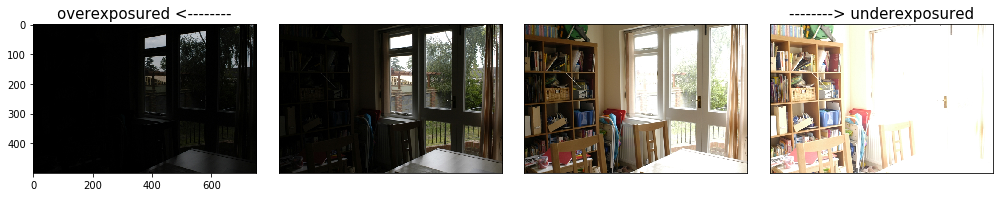

In [14]:
images = readImagesAndTimes()
showImages(images)


In [15]:
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'merged image')

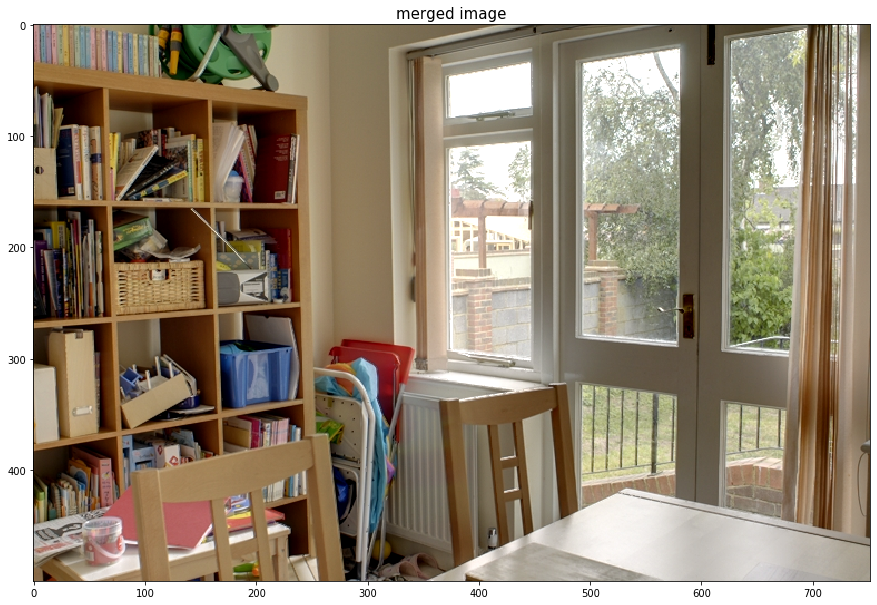

In [25]:
mergeMertens = cv2.createMergeMertens()

mergeMertens.setExposureWeight(1)
mergeMertens.setSaturationWeight(1)
mergeMertens.setContrastWeight(1)

exposureFusion = mergeMertens.process(images)

plt.figure(constrained_layout=False,figsize=(15,15))
plt.imshow(cv2.cvtColor(exposureFusion,cv2.COLOR_BGR2RGB))
plt.title("merged image", fontsize=15)
